In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [2]:
with open('../Models/clf.pkl', 'rb') as f:
    model = pickle.load(f)

In [24]:
type(model)

sklearn.ensemble._forest.RandomForestClassifier

In [6]:
FEATURES = [
    'AdjOE_mean', 'EFG%_mean', 'FGA3_mean', 'TO_mean', 'OR_mean', 'FT%_mean', # Offense
    'AdjDE_mean', 'OppEFG%_mean', 'OppFGA3_mean', 'OppTO_mean', 'OppOR_mean', # Defense
    'AdjNE_mean', 'Poss_mean', 'SOS', 'Q1_WinPct', 'Q2_WinPct' # Other
]

[Text(0.5, 0.9, 'EFG%_mean <= -0.024\ngini = 0.5\nsamples = 116978\nvalue = [46819.5, 46932.5]\nclass = Win'),
 Text(0.25, 0.7, 'Q1_WinPct <= 0.202\ngini = 0.455\nsamples = 57415\nvalue = [29924.0, 16148.0]\nclass = Lose'),
 Text(0.125, 0.5, 'Q2_WinPct <= -0.539\ngini = 0.42\nsamples = 48847\nvalue = [27346.5, 11729.5]\nclass = Lose'),
 Text(0.0625, 0.3, 'AdjNE_mean <= -1.099\ngini = 0.271\nsamples = 19951\nvalue = [13379.0, 2572.5]\nclass = Lose'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'AdjOE_mean <= -0.472\ngini = 0.478\nsamples = 28896\nvalue = [13967.5, 9157.0]\nclass = Lose'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'SOS <= 1.131\ngini = 0.465\nsamples = 8568\nvalue = [2577.5, 4418.5]\nclass = Win'),
 Text(0.3125, 0.3, 'Q2_WinPct <= 0.13\ngini = 0.489\nsamples = 6634\nvalue = [2290.0, 3095.5]\nclass = Win'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (

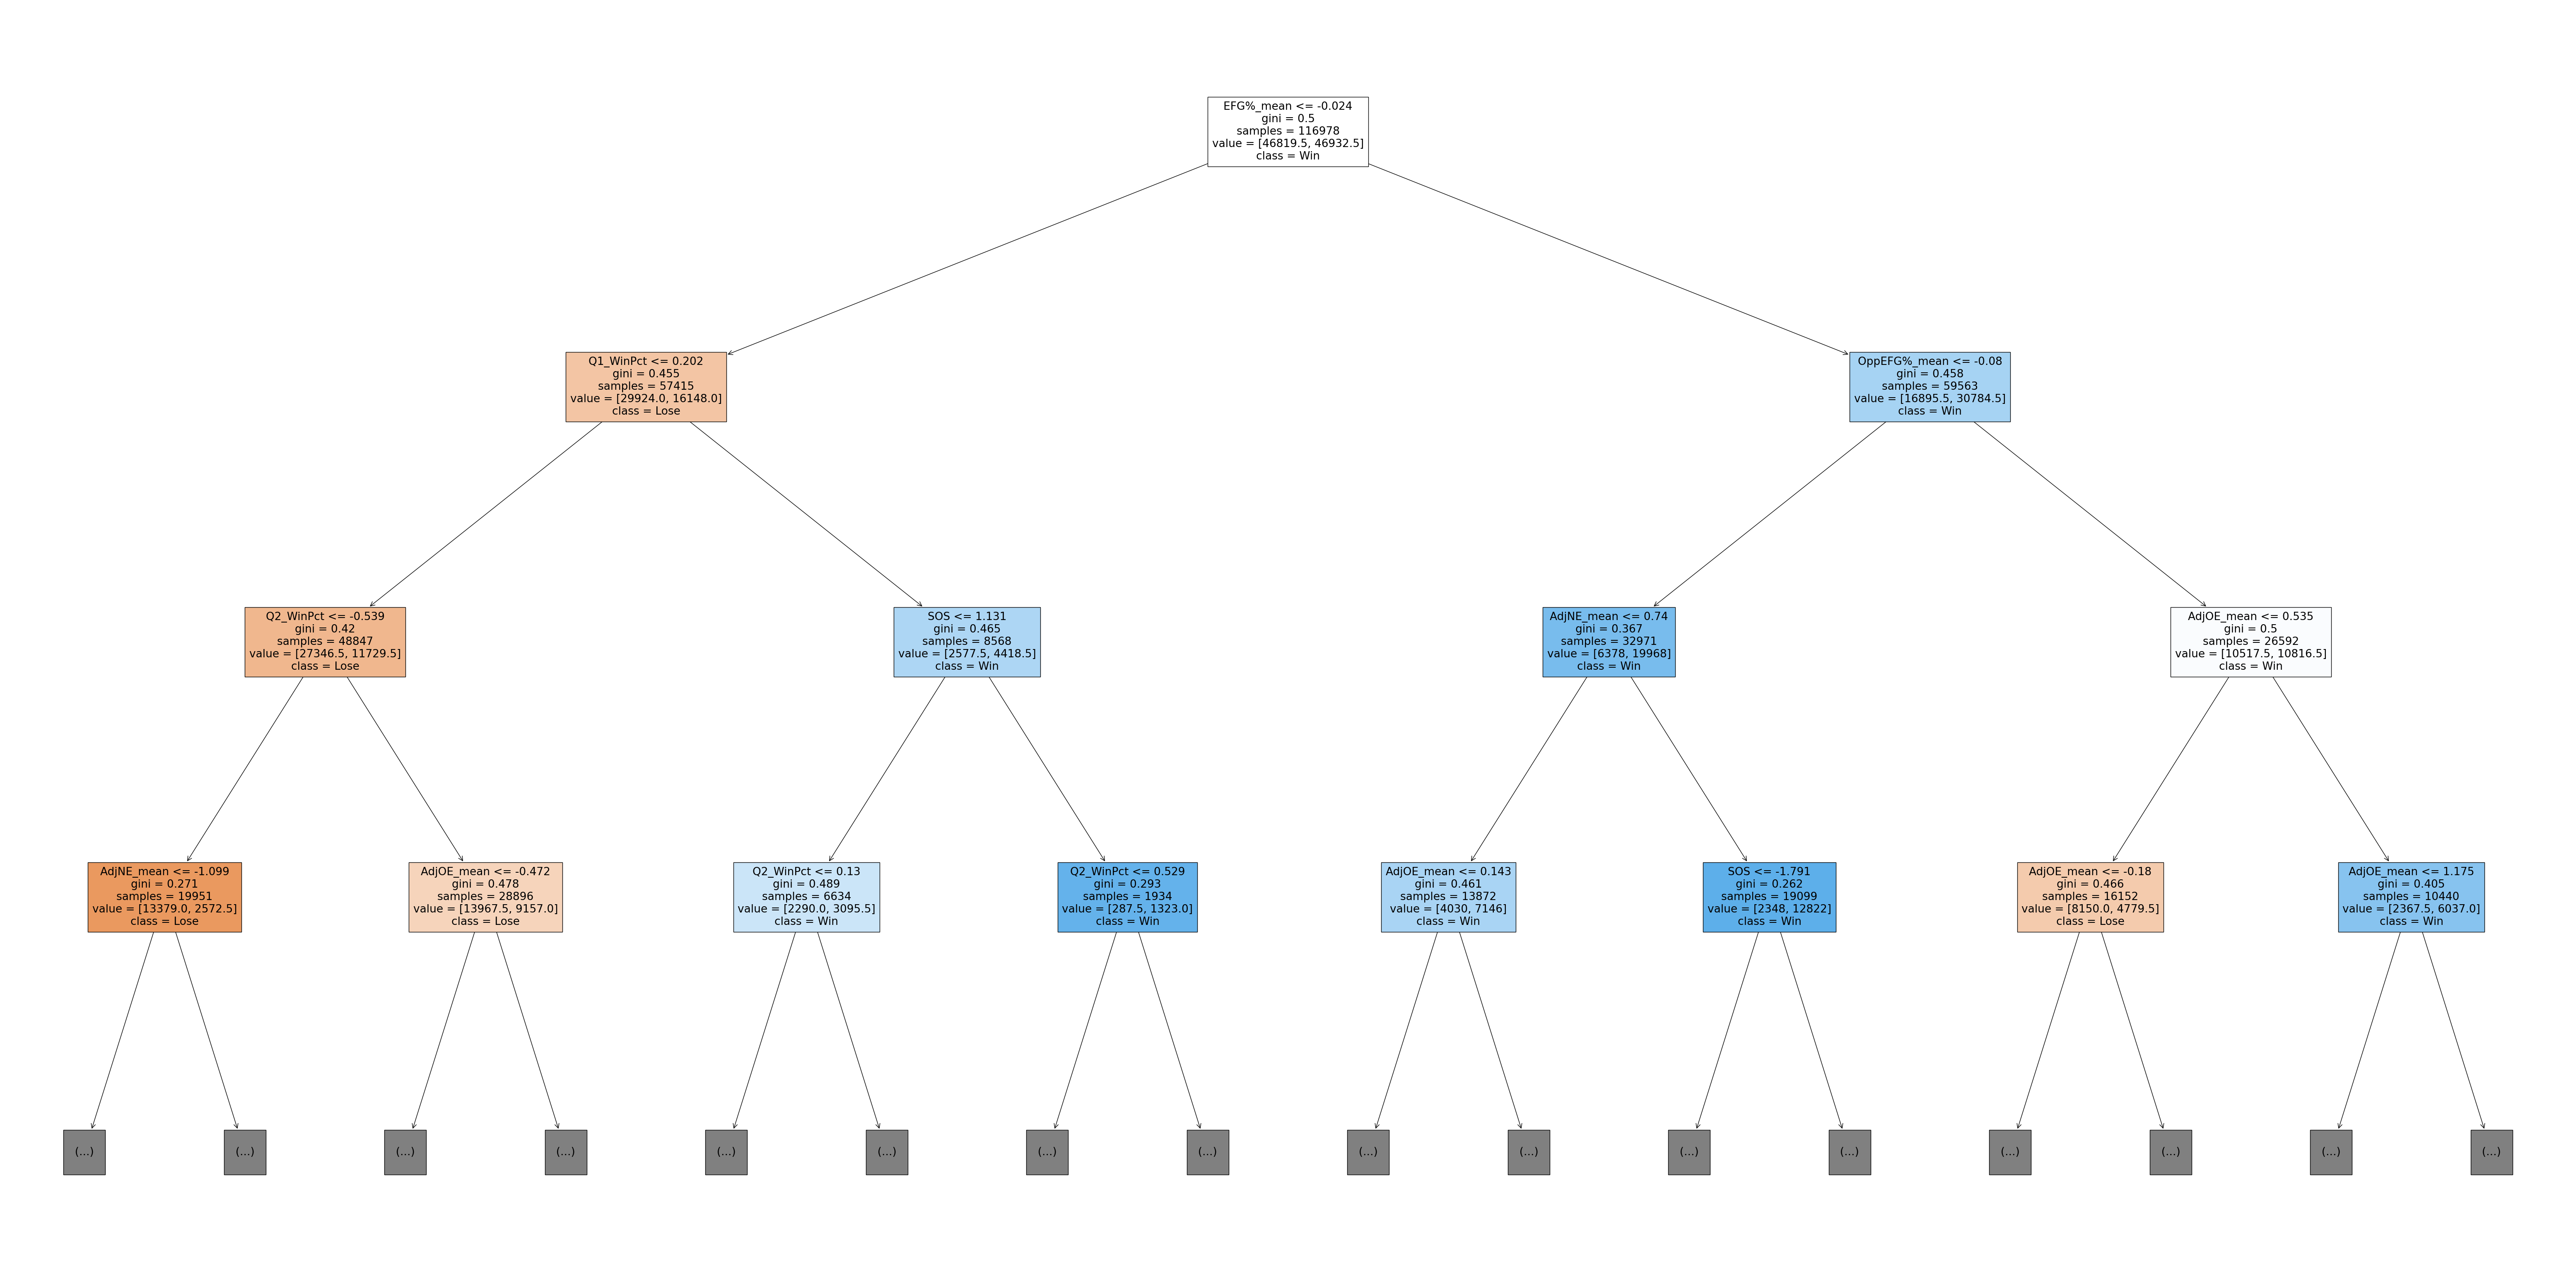

In [23]:
plt.figure(figsize=(80,40))
# Plot only the top two levels of the tree
plot_tree(model.estimators_[0], feature_names = FEATURES, class_names=['Lose', "Win"],filled=True, max_depth=3)

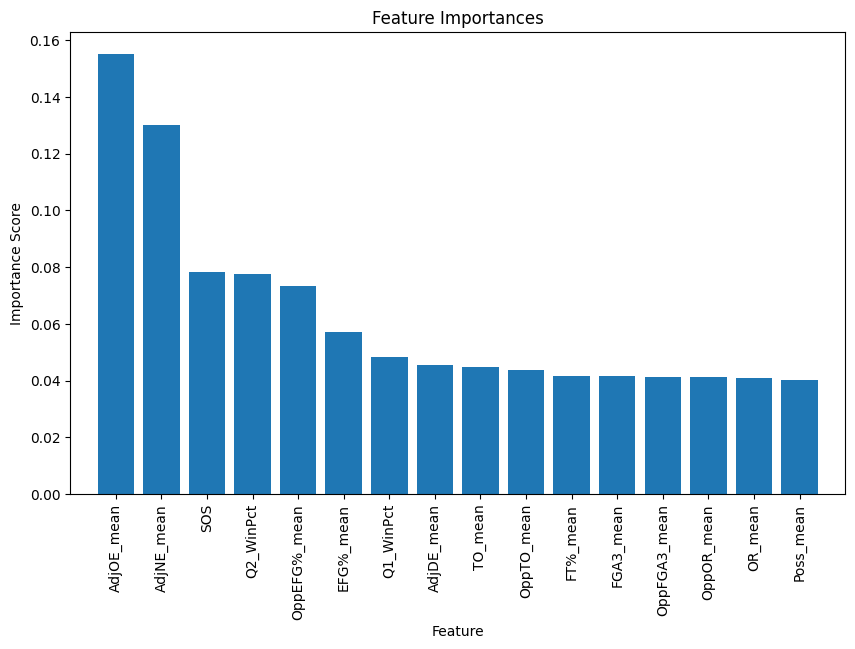

In [17]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(FEATURES)), importances[indices], align="center")
plt.xticks(range(len(FEATURES)), [FEATURES[i] for i in indices], rotation=90)
plt.xlim([-1, len(FEATURES)])
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

In [8]:
# Visualize our sklearn.ensemble._forest.RandomForestClassifier model
from sklearn.tree import export_graphviz
from IPython.display import Image

# Extract single tree
estimator = model.estimators_[5]


# Export as dot file

export_graphviz(estimator,
                out_file='tree.dot', 
                feature_names = FEATURES,
                class_names = ['Win', 'Loss'],
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command
from subprocess import call

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


KeyboardInterrupt: 